In [ ]:
import keras

### 케라스의 신경망 학습 수행 절차
1) 데이터를 준비한다\
2) 인공 신경망 모형을 구성한다\
3) 모형의 학습 과정에 대한 설정을 한다\
4) 모형을 학습시킨다\
5) 모형의 성능을 평가한다

#### 1) 데이터 준비

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target


In [ ]:
from keras.utils import to_categorical

y = to_categorical(y, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=0)


#### 2) 인공신경망 모형을 구성
models 의 sequential 을 이용하여 신경망의 층을 순서대로 쌓을 수 있도로 초기화 한다
layers 의 Dense를 이용하여 입력과 출력이 모두 연결된 은닉층들과 출력층을 생성하여 add함수로 추가
- unit : 해당 층에 배치할 노드의 수
- input_aim 입력 특성의 수, 즉 입력 노드의 개수. 최초 은닉층 외에는 기재하지 않는다
- activation 활성화 함수 (Relu 사용)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=8, input_dim=4,
                kernel_initializer='uniform',
                activation='relu'))
model.add(Dense(units=3, activation='softmax'))

#### 3) 모형의 학습 과정에 대한 설정을 한다
- 다중 클래스 분류이므로 손실함수로 categorical_crossentropy 로 최적화 기법을 adam으로 지정한다 

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

In [ ]:
model.summary()

#### 4) 모형 학습
모형에 대해 fit 함수를 이용하여 학습을 수행한다. 추가 옵션은 다음과 같다
- epochs 학습의 반복 횟수
- batch_size 배치의 크기
- verbose 학습 경과를 출력하는 옵션. 0은 출력 안함, 1은 매 학습 단게마다, 2는 진행 막대 없이 학습 단계 출력

In [ ]:
model.fit(X_train, y_train,
         epochs = 100,
         batch_size = 10,
         verbose= 2)

In [ ]:
hist = model.fit(X_train, y_train,
         epochs = 100,
         batch_size = 10,
         verbose= 0)

hist.history['accuracy']

#### 5) 모형의 성능을 평가한다
- 모형에 대해 evaluate 함수를 이용하여 평가함. 반환되는 결과는 손실값과 정확도가 항목인 튜플


In [ ]:
loss, acc = model.evaluate(X_test, y_test)

In [ ]:
print("손실값:",round(loss, 3))
print("정확도:", round(acc, 3))

6) 임의의 데이터에 대해서 모형의 출력을 확인


In [ ]:
from numpy.random import random
from numpy import round

X_new = round(random([3, 4]) * 10, 2) 
print(X_new)

In [ ]:
# 모형에 대해 predict 함수를 이용하여 출력 : 출력층의 확성화 함수에 의해 추정된 확률(소프트 맥스 점수)
y_pred = model.predict(X_new)
print(y_pred)

In [ ]:
y_pred_class = model.predict_classes(X_new)
print(y_pred_class)

In [ ]:
import sklearn.datasets as d

mnist = d.fetch_openml("mnist_784", version = 1) # 데이터 이름 : mnist_784


In [ ]:
X = mnist.data
y = mnist.target

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
import numpy as np
np.unique(y)

In [ ]:
y = y.astype(np.int)

In [ ]:
np.unique(y)

In [ ]:
# X[0] 

import matplotlib.pyplot as plt
type(X[0][0]) # 정수로 바꿔야 함

px = np.array(X[0], dtype = 'uint8').reshape((28, 28))

plt.imshow(px, cmap = 'gray')
print('label =', y[0]) 

### It's time to build our deep learning Neural Network Model

**Step 1:**\
Importing data. Pandas DataFrame gives massive functionality to work on data thus, here we are using pandas to import data.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
    
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [2]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Step 2:**

Create matrix of features and matrix of target variable. In this case we are excluding column 1 & 2 as those are ‘row_number’ and ‘customerid’ which are not useful in our analysis. Column 14, ‘Exited’ is our Target Variable

In [3]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

**Step 3:**\
Let’s make analysis simpler by encoding string variables. Country has string labels such as “France, Spain, Germany” while Gender has “Male, Female”. We have to encode this strings into numeric and we can simply do it using pandas but here I am introducing new library called ‘ScikitLearn’ which is strongest machine learning library in python

In [4]:
# ‘LabelEncoder’. function will automatically encode different labels in that column with values between 0 to n_classes -1

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])


In [5]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

Now we can see that Country names are replaced by 0,1 and 2 while male and female are replaced by 0 and 1.

### Step 4:
How to create dummy variable in python? We will use the same ScikitLearn library but this time we will use another function called as ‘OneHotEncoder’

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

**Step 5:**\
We will make use of ScikitLearn’s ‘train_test_split’ function to divide our data. Roughly people keep 80:20, 75:25, 60:40 as their train test split ratio. Here we are keeping it as 80:20.

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Step 6:**\
‘StandardScaler’ is available in ScikitLearn. In the following code we are fitting and transforming StandardScaler method on train data. We have to standardize our scaling so we will use the same fitted method to transform/scale test data.

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Step 7:**
Importing required Modules. We need Sequential module for initializing NN and dense module to add Hidden Layers.

In [8]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

**Step 8:**
I am giving the name of model as Classifier as our business problem is the classification of customer churn. In the last step, I mentioned that we will use Sequential module for initialization so here it is:

In [9]:
#Initializing Neural Network
classifier = Sequential()

**Step 9:**
Adding multiple hidden layer will take bit effort. We will add hidden layers one by one using dense function. In the below code you will see a lot of arguments. Don’t worry I will explain them all.

Our first parameter is **output_dim**. It is simply the number of nodes you want to add to this layer. **init** is the initialization of Stochastic Gradient Decent. In Neural Network we need to assign weights to each mode which is nothing but importance of that node. At the time of initialization, weights should be close to 0 and we will randomly initialize weights using uniform function. **input_dim** parameter is needed only for first layer as model doesn’t know the number of our input variables. Remember in our case, the total number of input variables are 11. In the second layer model automatically knows the number of input variable from the first hidden layer.

**Activation Function**: Very important to understand. Neuron applies activation function to weighted sum(summation of Wi * Xi where w is weight, X is input variable and i is suffix of W and X). The closer the activation function value to 1 the more activated is the neuron and more the neuron passes the signal. Which activation function should be used is critical task. Here we are using **rectifier(relu) function** in our hidden layer and Sigmoid function in our output layer as we want binary result from output layer but if the number of categories in output layer is more than 2 then use SoftMax function.

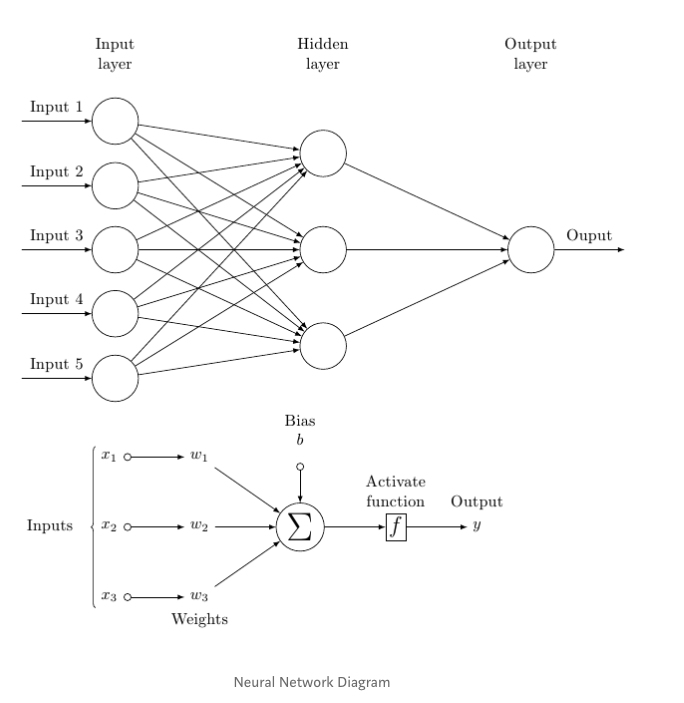

In [10]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "/Users/ingeonhwang/Desktop/1.Yonsei_bigdata_analysis/IMAGE_capture/Neural Network Diagram.png", width = 600, height = 300)

In [19]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation='relu', input_dim=11,
                     kernel_initializer='uniform', units=6))

# Adding second hidden layer
classifier.add(Dense(activation='relu', kernel_initializer='uniform', units=6))

# Adding output layer
classifier.add(Dense(activation='sigmoid', kernel_initializer='uniform', units=1))

### Step 10: 
Till now we have added multiple layers to out classifier now let’s compile them which can be done using compile method. Arguments added in final compilation will control whole neural network so be careful on this step. I will briefly explain arguments.

In [20]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Step 11: 
We will now train our model on training data but still one thing is remaining. We use fit method to the fit our model In previous some steps I said that we will be optimizing our weights to improve model efficiency so when are we updating out weights? Batch size is used to specify the number of observation after which you want to update weight. Epoch is nothing but the total number of iterations. Choosing the value of batch size and epoch is trial and error there is no specific rule for that.

In [16]:
# Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 11 but received input with shape [10, 10]


In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 11 but received input with shape [None, 10]


In [ ]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)